In [131]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as sint

from src.utils.plotting import init_plot_style
# % pylab

# initialize our global plot style
init_plot_style()

## Task c)

In [132]:
class DuffingOsci():
    """
    Implements the dynamical system description of a pendulum.
    """

    def __init__(self, alpha=1, beta=0.2, delta=0.4):
        """
        Parameters
        ----------
        alpha : float
            Friction parameter.
        beta : float
            Geometry parameter.
        """
        self.alpha = alpha
        self.beta = beta
        self.delta = delta

    def flow(self, z: np.ndarray, t=None):
        """ Flow of a nonlinear dynamical system.

        Parameters
        ----------
        z : numpy.ndarray
            State vector or batch of state vectors.
        t : numpy.ndarray
            Time.

        Returns
        ------
        numpy.ndarray
            The flow evaluated at state(s) z.
        """
        assert z.shape[0] == 2
        z = z.reshape(2, -1)
        xdot = z[1, :]
        ydot = self.alpha * z[0, :] - z[0, :]**3 - self.delta * z[1, :] + self.beta * np.cos(t) 
        zdot = np.stack((xdot, ydot), axis=0)
        return zdot if zdot.shape[1] > 1 else zdot.squeeze(1)

    def compute_trajectory(self, z: np.ndarray, t_max: float, Ts: float):
        """ Computes the system trajectory for a given initial state..

        Parameters
        ----------
        z : numpy.ndarray
            Initial state vector.
        t_max : float
            Maximum trajectory length in seconds.
        Ts : float
            Evaluation step size in seconds.

        Returns
        ------
         numpy.ndarray, numpy.ndarray
            The trajectory (sequence of state vectors) and a time vector.
        """
        time_steps = int(t_max / Ts)
        t = np.linspace(0., t_max, time_steps)
        return sint.odeint(self.flow, z, t).T, t


### i) $\alpha=0, ~ \beta=5,~ \delta = 0.7$

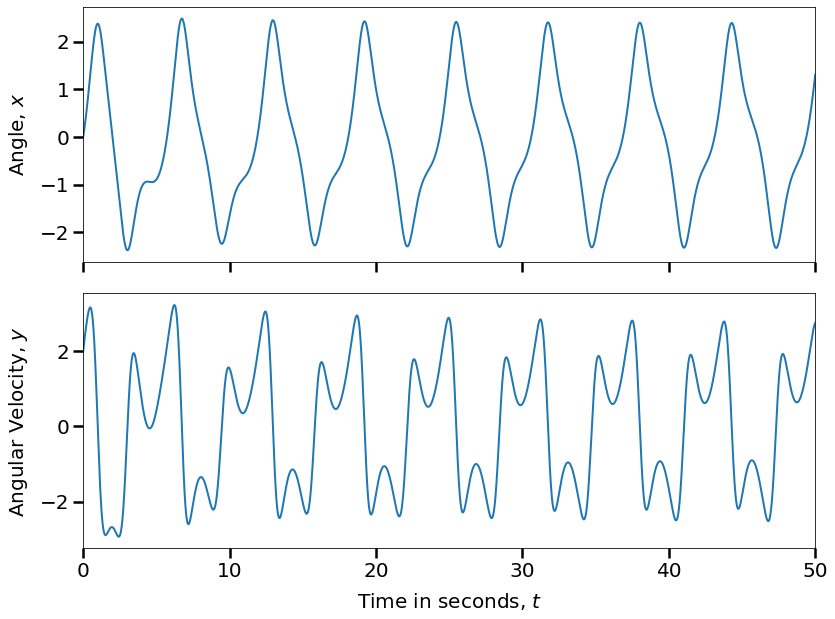

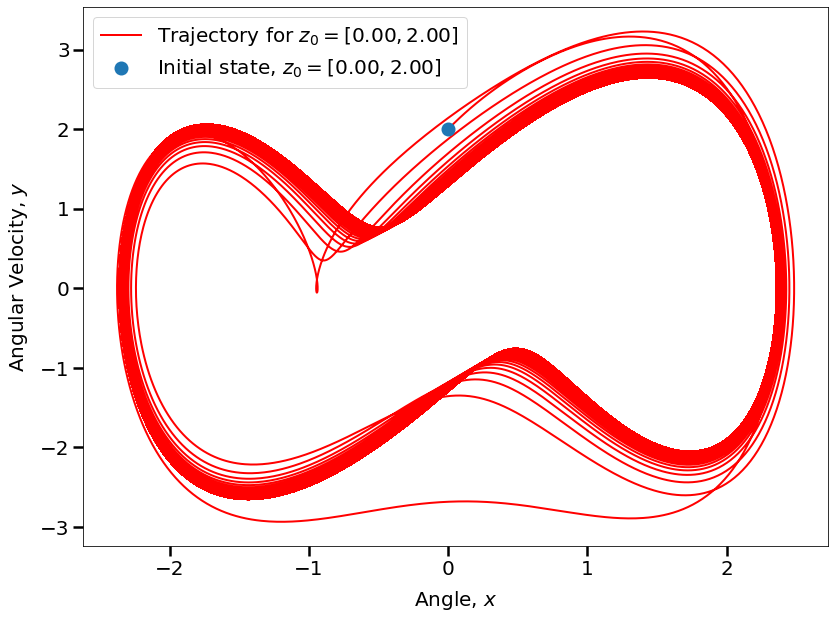

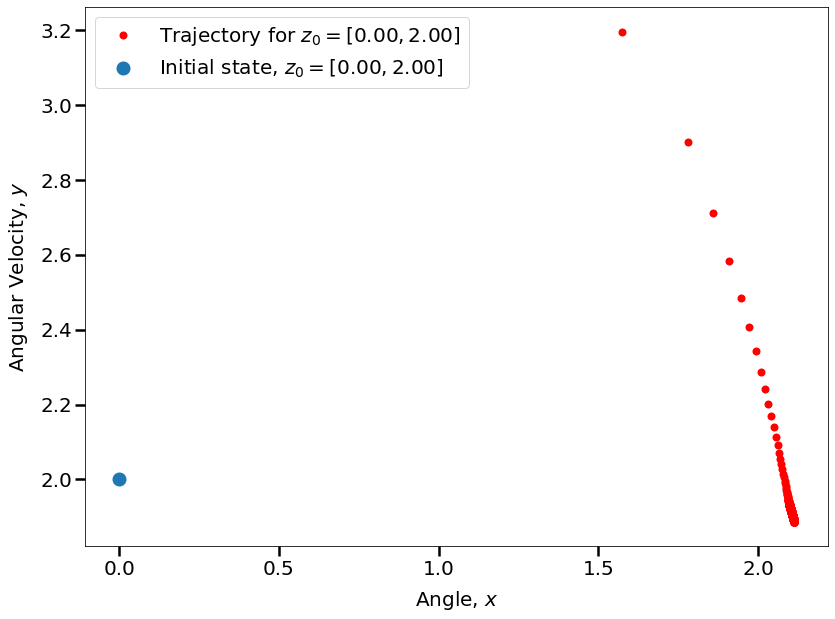

In [133]:
# create duffing osci
duffing = DuffingOsci(alpha=0., beta=5., delta=0.7)
N = 1000 
Ts = 2*np.pi/N

# define initial state and compute trajectory
z0 = np.array([0, 0])
z0 = np.array([np.pi / 2, 0])
z0 = np.array([0, 2.])
trajectory, time = duffing.compute_trajectory(z0, t_max=10e3, Ts=Ts)

# plot trajectory as a function of time
fig, ax = plt.subplots(2, 1, sharex=True)
plt.xlabel('Time in seconds, $t$')
ax[0].plot(time, trajectory[0, :])
ax[0].set_ylabel('Angle, $x$')
ax[1].plot(time, trajectory[1, :])
ax[1].set_ylabel('Angular Velocity, $y$')
ax[0].set_xlim([0,50])
ax[1].set_xlim([0,50])
plt.tight_layout()

# plot phase space with example trajectory
plt.figure()
plt.plot(trajectory[0, :], trajectory[1, :], 'r', label=f'Trajectory for $z_0 = [{z0[0]:.2f}, {z0[1]:.2f}]$')
plt.plot(z0[0], z0[1], 'o', label=f'Initial state, $z_0 = [{z0[0]:.2f}, {z0[1]:.2f}]$')
plt.xlabel('Angle, $x$')
plt.ylabel('Angular Velocity, $y$')
plt.legend()
plt.tight_layout()

# Poincare section

plt.figure()
plt.plot(trajectory[0, ::N], trajectory[1, ::N], 'r.', label=f'Trajectory for $z_0 = [{z0[0]:.2f}, {z0[1]:.2f}]$')
plt.plot(z0[0], z0[1], 'o', label=f'Initial state, $z_0 = [{z0[0]:.2f}, {z0[1]:.2f}]$')
plt.xlabel('Angle, $x$')
plt.ylabel('Angular Velocity, $y$')
plt.legend()
plt.tight_layout()


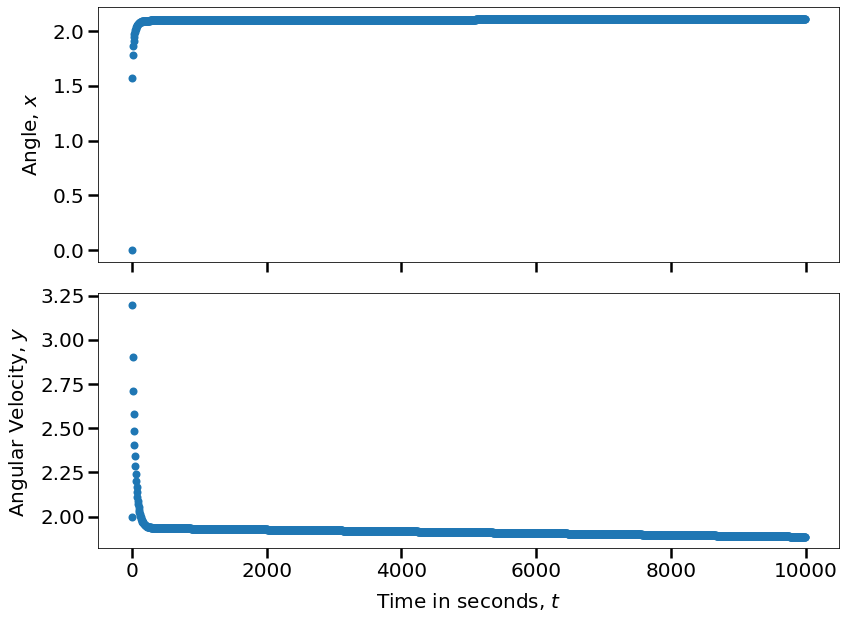

In [134]:
# plot trajectory as a function of time
fig, ax = plt.subplots(2, 1, sharex=True)
plt.xlabel('Time in seconds, $t$')
ax[0].plot(time[::N], trajectory[0, ::N], '.')
ax[0].set_ylabel('Angle, $x$')
ax[1].plot(time[::N], trajectory[1, ::N], '.')
ax[1].set_ylabel('Angular Velocity, $y$')
#ax[0].set_xlim([0,50])
#ax[1].set_xlim([0,50])
plt.tight_layout()

### ii) $\alpha=0, ~ \beta=20,~ \delta = 0.17$

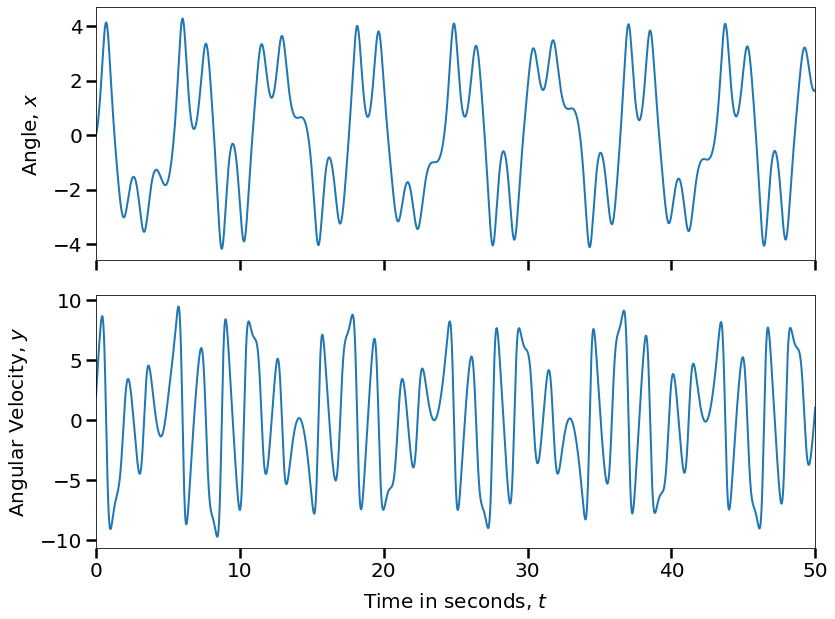

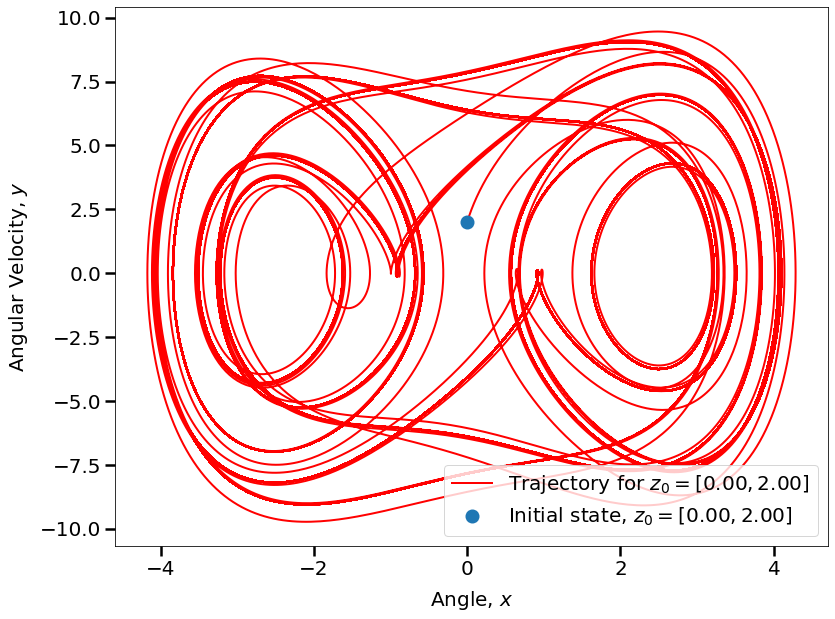

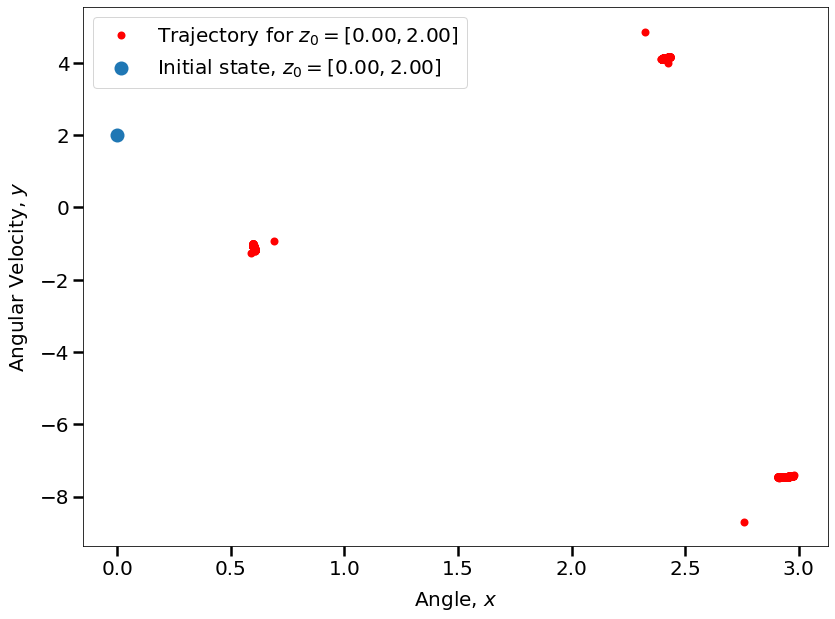

In [163]:
# create duffing osci
duffing = DuffingOsci(alpha=0., beta=20., delta=0.17)
N = 1000
Ts = 2*np.pi/N

# define initial state and compute trajectory
z0 = np.array([0, 0])
z0 = np.array([np.pi / 2, 0])
z0 = np.array([0, 2.])
trajectory, time = duffing.compute_trajectory(z0, t_max=10e3, Ts=Ts)

# plot trajectory as a function of time
fig, ax = plt.subplots(2, 1, sharex=True)
plt.xlabel('Time in seconds, $t$')
ax[0].plot(time, trajectory[0, :])
ax[0].set_ylabel('Angle, $x$')
ax[1].plot(time, trajectory[1, :])
ax[1].set_ylabel('Angular Velocity, $y$')
ax[0].set_xlim([0,50])
ax[1].set_xlim([0,50])
plt.tight_layout()

# plot phase space with example trajectory
plt.figure()
plt.plot(trajectory[0, :], trajectory[1, :], 'r', label=f'Trajectory for $z_0 = [{z0[0]:.2f}, {z0[1]:.2f}]$')
plt.plot(z0[0], z0[1], 'o', label=f'Initial state, $z_0 = [{z0[0]:.2f}, {z0[1]:.2f}]$')
plt.xlabel('Angle, $x$')
plt.ylabel('Angular Velocity, $y$')
plt.legend()
plt.tight_layout()

# Poincare section

plt.figure()
plt.plot(trajectory[0, ::N], trajectory[1, ::N], 'r.', label=f'Trajectory for $z_0 = [{z0[0]:.2f}, {z0[1]:.2f}]$')
plt.plot(z0[0], z0[1], 'o', label=f'Initial state, $z_0 = [{z0[0]:.2f}, {z0[1]:.2f}]$')
plt.xlabel('Angle, $x$')
plt.ylabel('Angular Velocity, $y$')
plt.legend()
plt.tight_layout()

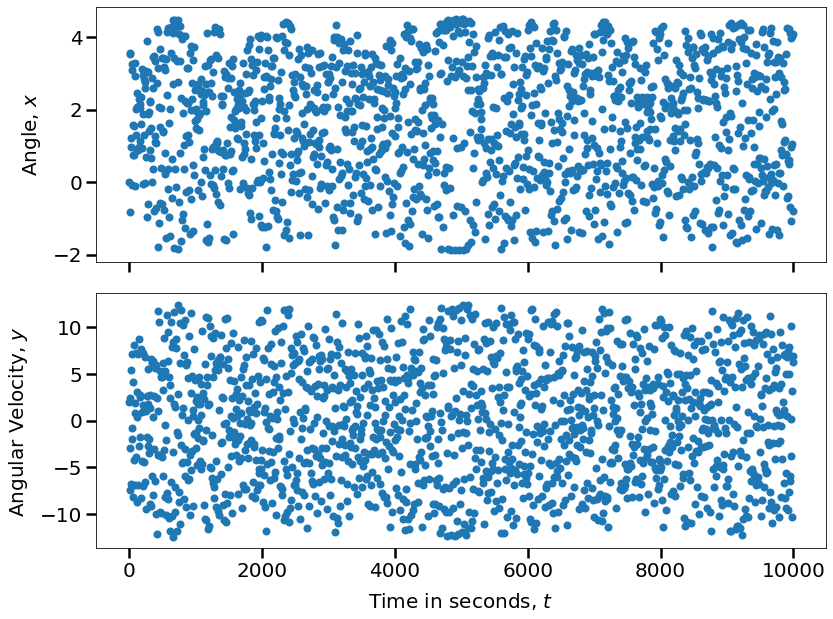

In [162]:
# plot trajectory as a function of time
fig, ax = plt.subplots(2, 1, sharex=True)
plt.xlabel('Time in seconds, $t$')
ax[0].plot(time[::N], trajectory[0, ::N], '.')
ax[0].set_ylabel('Angle, $x$')
ax[1].plot(time[::N], trajectory[1, ::N], '.')
ax[1].set_ylabel('Angular Velocity, $y$')
#ax[0].set_xlim([0,50])
#ax[1].set_xlim([0,50])
plt.tight_layout()

### iii) $\alpha=1, ~ \beta=0.4,~ \delta = 0.25$

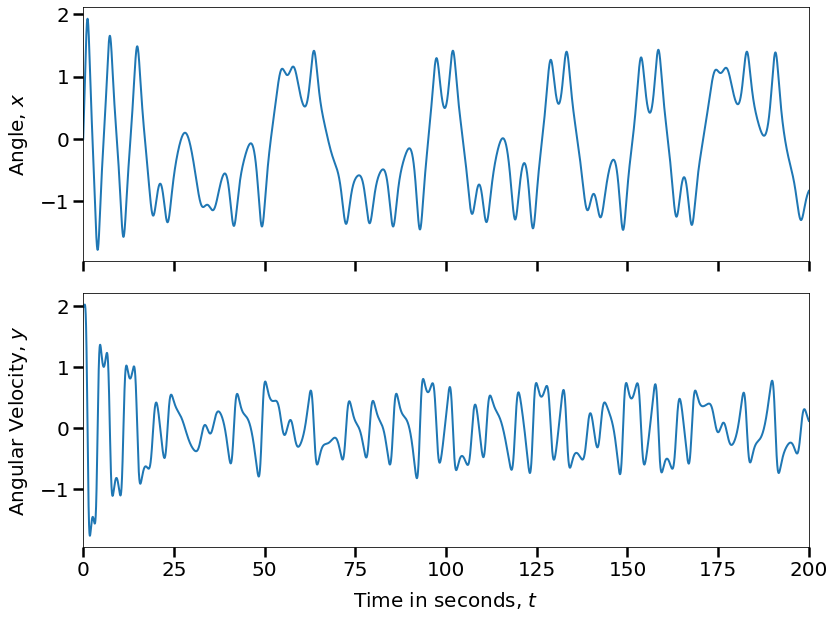

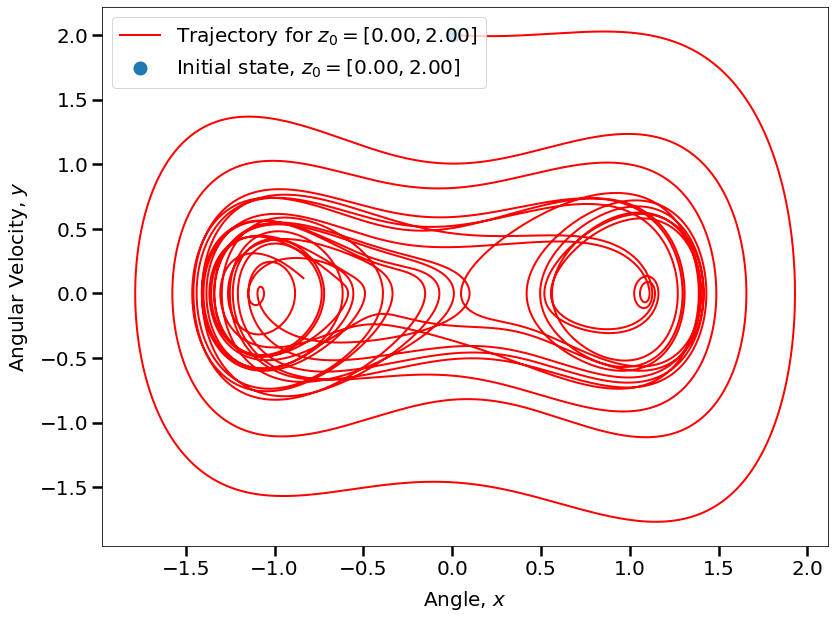

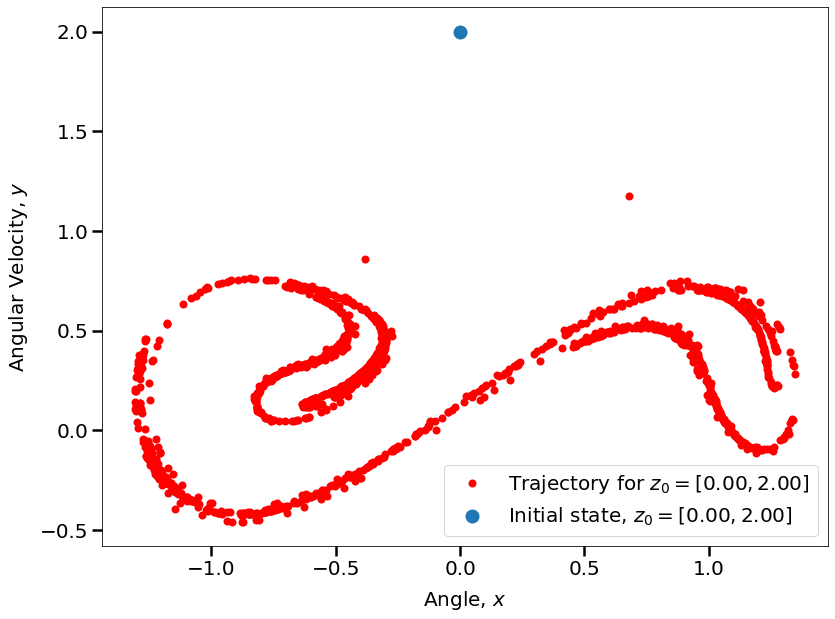

In [160]:
# create duffing osci
duffing = DuffingOsci(alpha=1., beta=0.4, delta=0.25)
N = 1000
Ts = 2*np.pi/N

# define initial state and compute trajectory
z0 = np.array([0, 0])
z0 = np.array([np.pi / 2, 0])
z0 = np.array([0, 2.])
trajectory, time = duffing.compute_trajectory(z0, t_max=10e3, Ts=Ts)

# plot trajectory as a function of time
fig, ax = plt.subplots(2, 1, sharex=True)
plt.xlabel('Time in seconds, $t$')
ax[0].plot(time, trajectory[0, :])
ax[0].set_ylabel('Angle, $x$')
ax[1].plot(time, trajectory[1, :])
ax[1].set_ylabel('Angular Velocity, $y$')
ax[0].set_xlim([0,200])
ax[1].set_xlim([0,200])
plt.tight_layout()

# plot phase space with example trajectory
N_end = np.round(10e3/Ts/50).astype(int)
plt.figure()
plt.plot(trajectory[0, :N_end], trajectory[1, :N_end], 'r', label=f'Trajectory for $z_0 = [{z0[0]:.2f}, {z0[1]:.2f}]$')
plt.plot(z0[0], z0[1], 'o', label=f'Initial state, $z_0 = [{z0[0]:.2f}, {z0[1]:.2f}]$')
plt.xlabel('Angle, $x$')
plt.ylabel('Angular Velocity, $y$')
plt.legend()
plt.tight_layout()

# Poincare section
plt.figure()
plt.plot(trajectory[0, ::N], trajectory[1, ::N], 'r.', label=f'Trajectory for $z_0 = [{z0[0]:.2f}, {z0[1]:.2f}]$')
plt.plot(z0[0], z0[1], 'o', label=f'Initial state, $z_0 = [{z0[0]:.2f}, {z0[1]:.2f}]$')
plt.xlabel('Angle, $x$')
plt.ylabel('Angular Velocity, $y$')
plt.legend()
plt.tight_layout()

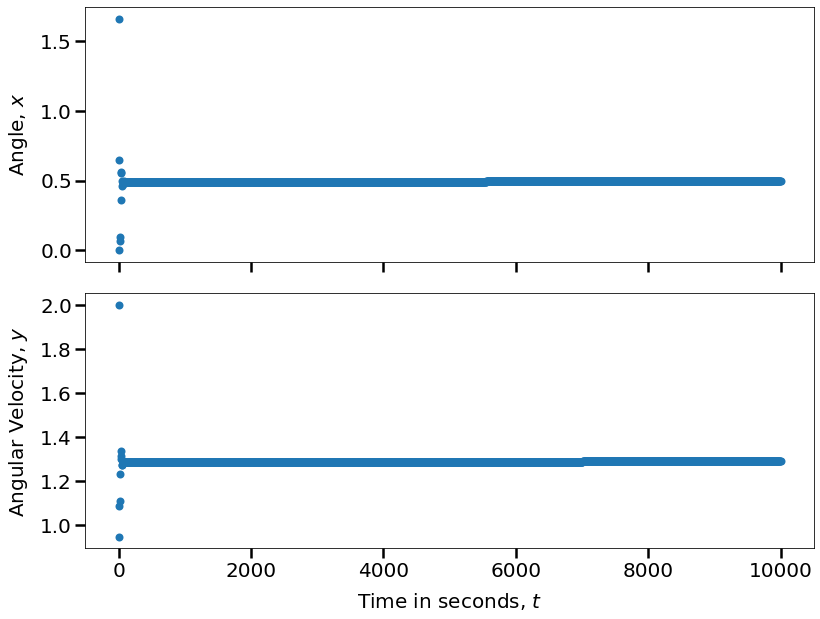

In [158]:
# plot trajectory as a function of time
fig, ax = plt.subplots(2, 1, sharex=True)
plt.xlabel('Time in seconds, $t$')
ax[0].plot(time[::N], trajectory[0, ::N], '.')
ax[0].set_ylabel('Angle, $x$')
ax[1].plot(time[::N], trajectory[1, ::N], '.')
ax[1].set_ylabel('Angular Velocity, $y$')
#ax[0].set_xlim([0,50])
#ax[1].set_xlim([0,50])
plt.tight_layout()